In [1]:
import torchio as tio
import torch
import matplotlib.pyplot as plt

from torchio.transforms import (
    RandomFlip,
    RandomAffine,
    RandomElasticDeformation, 
    RandomNoise,
    RandomMotion,
    RandomBiasField,
    RescaleIntensity,
    Resample,
    ToCanonical,
    ZNormalization,
    CropOrPad,
    HistogramStandardization,
    OneOf,
    Compose,
    RandomSwap,
)

In [2]:
flair_path = r'datasets\MICCAI_2008_MS_Lesions\training\training01\preprocessed\training01_01_flair_pp.nii'
mprage_path = r'datasets\MICCAI_2008_MS_Lesions\training\training01\preprocessed\training01_01_mprage_pp.nii'
pd_path = r'datasets\MICCAI_2008_MS_Lesions\training\training01\preprocessed\training01_01_pd_pp.nii'
t2_path = r'datasets\MICCAI_2008_MS_Lesions\training\training01\preprocessed\training01_01_t2_pp.nii'
mask_path = r'datasets\MICCAI_2008_MS_Lesions\training\training01\masks\training01_01_mask1.nii'

subject = tio.Subject(
                    flair = tio.ScalarImage(flair_path),
                    mprage = tio.ScalarImage(mprage_path),
                    pd = tio.ScalarImage(pd_path),
                    t2 = tio.ScalarImage(t2_path),
                    mask = tio.LabelMap(mask_path)
                )

subject.flair.data.shape

torch.Size([1, 181, 217, 181])

In [3]:
def showImage(data, outputname, cmap='gray'):
    fig = plt.figure(figsize=(3,3))
    plt.imshow(transform(data)[0][:, :, 90], cmap=cmap); plt.axis('off');
    plt.savefig(outputname)
    plt.show()
    plt.clf()

C:\Users\VIP444\anaconda3\envs\torch\lib\site-packages\torchio\transforms\preprocessing\spatial\crop_or_pad.py:169: RuntimeWarning: Mask name "mask" not found in subject keys "('default_image_name',)". Using volume center instead
  warnings.warn(message, RuntimeWarning)


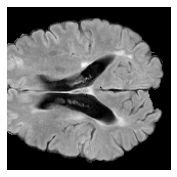

<Figure size 432x288 with 0 Axes>

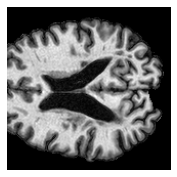

<Figure size 432x288 with 0 Axes>

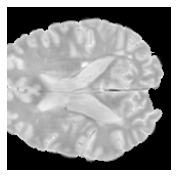

<Figure size 432x288 with 0 Axes>

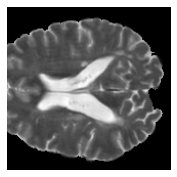

<Figure size 432x288 with 0 Axes>

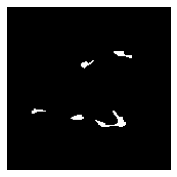

<Figure size 432x288 with 0 Axes>

In [4]:
transform = tio.Compose([
    CropOrPad((160,160,160), mask_name='mask'),
])

sample = transform(subject)

cmap = 'gray'

showImage(sample.flair.data, r'dataset-sample/flair.png', cmap=cmap)
showImage(sample.mprage.data, r'dataset-sample/mprage.png', cmap=cmap)
showImage(sample.pd.data, r'dataset-sample/pd.png', cmap=cmap)
showImage(sample.t2.data, r'dataset-sample/t2.png', cmap=cmap)
showImage(sample.mask.data, r'dataset-sample/mask.png', cmap=cmap)

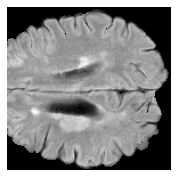

<Figure size 432x288 with 0 Axes>

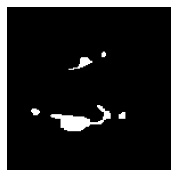

<Figure size 432x288 with 0 Axes>

In [5]:
transform = tio.Compose([
    CropOrPad((144,144,144), mask_name='mask'),
])

original = transform(subject)

showImage(original.flair.data, r'augmentation-sample/Original1.png')
showImage(original.mask.data, r'augmentation-sample/Original2.png')

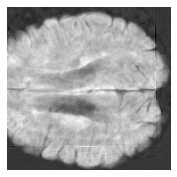

<Figure size 432x288 with 0 Axes>

In [6]:
transform = tio.Compose([
    CropOrPad((144,144,144), mask_name='mask'),
    RandomMotion(degrees=10,num_transforms=6),
])

random_motion_sample = transform(subject)

showImage(random_motion_sample.flair.data, r'augmentation-sample/RandomMotion.png')

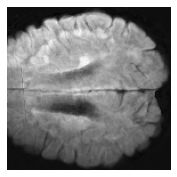

<Figure size 432x288 with 0 Axes>

In [7]:
transform = tio.Compose([
    CropOrPad((144,144,144), mask_name='mask'),
    RandomBiasField(),
])

random_bias_field_sample = transform(subject)
showImage(random_motion_sample.flair.data, r'augmentation-sample/RandomBiasField.png')

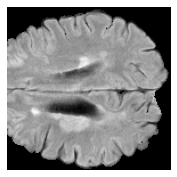

<Figure size 432x288 with 0 Axes>

In [8]:

transform = tio.Compose([
    CropOrPad((144,144,144), mask_name='mask'),
    RandomNoise(),
])
random_noise_sample = transform(subject)
showImage(random_noise_sample.flair.data, r'augmentation-sample/RandomNoise.png')

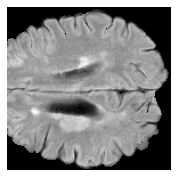

<Figure size 432x288 with 0 Axes>

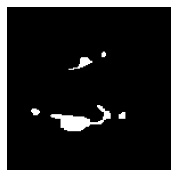

<Figure size 432x288 with 0 Axes>

In [17]:
transform = tio.Compose([
    CropOrPad((144,144,144), mask_name='mask'),
    RandomFlip(axes=(0,), flip_probability=1),
])

random_flip_sample = transform(subject)
showImage(random_flip_sample.flair.data, r'augmentation-sample/RandomFlip1.png')
showImage(random_flip_sample.mask.data, r'augmentation-sample/RandomFlip2.png')

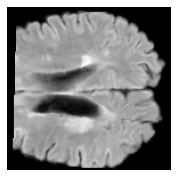

<Figure size 432x288 with 0 Axes>

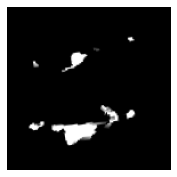

<Figure size 432x288 with 0 Axes>

In [10]:

transform = tio.Compose([
    CropOrPad((144,144,144), mask_name='mask'),
    RandomAffine(
    ),
])

random_affine_sample = transform(subject)
showImage(random_affine_sample.flair.data, r'augmentation-sample/RandomAffine1.png')
showImage(random_affine_sample.mask.data, r'augmentation-sample/RandomAffine2.png')

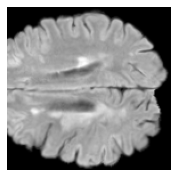

<Figure size 432x288 with 0 Axes>

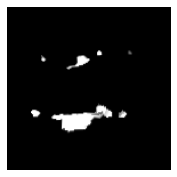

<Figure size 432x288 with 0 Axes>

In [11]:
transform = tio.Compose([
    CropOrPad((144,144,144), mask_name='mask'),
    RandomElasticDeformation(
    ),
])

random_elasticdeformation_sample = transform(subject)
showImage(random_elasticdeformation_sample.flair.data, r'augmentation-sample/RandomElasticDeformation1.png')
showImage(random_elasticdeformation_sample.mask.data, r'augmentation-sample/RandomElasticDeformation2.png')

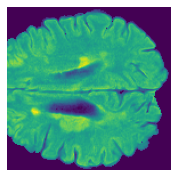

<Figure size 432x288 with 0 Axes>

In [12]:
fig = plt.figure(figsize=(3,3))


transform = tio.Compose([
    CropOrPad((144,144,144), mask_name='mask'),
    ZNormalization(
    ),
])

random_motion_sample = transform(subject)
plt.imshow(random_motion_sample.flair.data[0][:, :, 90])
# plt.imshow(random_motion_sample.mask.data[0][:, :, 90], alpha=0.2)
plt.axis('off')

plt.savefig(r'augmentation-sample/ZNormalization.png')
plt.show()
plt.clf()

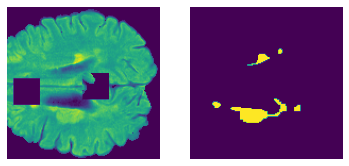

<Figure size 432x288 with 0 Axes>

In [13]:
fig = plt.figure()

transform = tio.Compose([
    CropOrPad((144,144,144), mask_name='mask'),
    RandomSwap((25), num_iterations=10
    ),
])

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

random_motion_sample = transform(subject)
ax1.imshow(random_motion_sample.flair.data[0][:, :, 90]); ax1.axis('off');
ax2.imshow(random_motion_sample.mask.data[0][:, :, 90]); ax2.axis('off');
plt.axis('off')

plt.savefig(r'augmentation-sample/RandomSwap.png')
plt.show()
plt.clf()